In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [3]:
#12

In [19]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_3_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1011.683, BIC=1022.799, Time=0.853 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1032.108, BIC=1037.666, Time=0.024 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1026.935, BIC=1035.272, Time=0.154 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1014.704, BIC=1023.042, Time=0.164 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1030.377, BIC=1033.156, Time=0.025 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1010.910, BIC=1024.806, Time=0.352 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1015.115, BIC=1026.231, Time=0.293 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1012.233, BIC=1028.908, Time=0.614 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1008.190, BIC=1024.865, Time=0.787 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1011.893, BIC=1025.

In [20]:
# 13

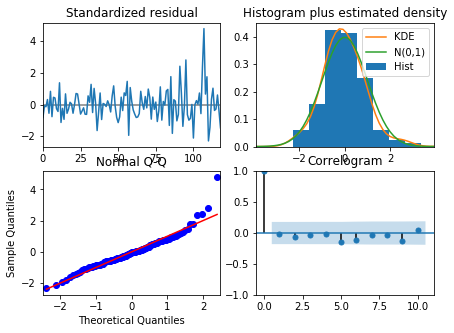

In [21]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

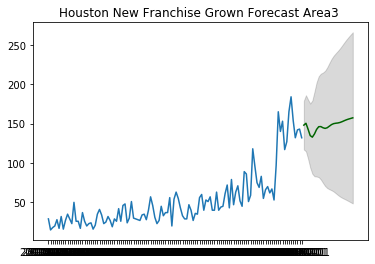

In [27]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecast Area3 ")
plt.show()

In [28]:
confint

array([[117.05076969, 178.99140145],
       [114.77613424, 185.99030495],
       [105.19754679, 180.38451459],
       [ 94.03080102, 175.45107991],
       [ 86.21153677, 179.32416282],
       [ 83.09388634, 190.55842354],
       [ 82.78904078, 202.4105974 ],
       [ 81.97596335, 210.11936246],
       [ 78.99075151, 213.36944496],
       [ 74.66160754, 214.75070138],
       [ 70.70815422, 217.06164922],
       [ 68.09181674, 221.36750078],
       [ 66.59839715, 226.83972281],
       [ 65.3734114 , 232.02409617],
       [ 63.7285076 , 236.11316174],
       [ 61.58537532, 239.28395011],
       [ 59.32376214, 242.22790578],
       [ 57.34015435, 245.49436791],
       [ 55.75061138, 249.15897632],
       [ 54.3998229 , 252.93940349],
       [ 53.06030758, 256.52499152],
       [ 51.61657467, 259.80980559],
       [ 50.10746144, 262.89803096],
       [ 48.64295839, 265.95936485]])

In [24]:
#14

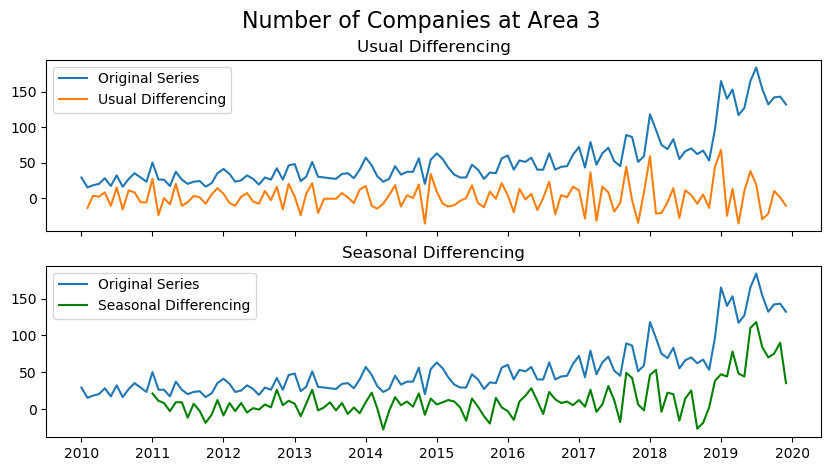

In [29]:
# Import
data = pd.read_csv('2010_zip_3_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Companies at Area 3', fontsize=16)
plt.show()

In [30]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=909.196, BIC=922.560, Time=1.798 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=967.054, BIC=972.400, Time=0.070 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=939.585, BIC=950.276, Time=1.012 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=910.816, BIC=921.507, Time=0.874 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=965.058, BIC=967.731, Time=0.032 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=941.128, BIC=951.819, Time=0.376 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=910.735, BIC=926.772, Time=1.958 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=910.612, BIC=926.649, Time=3.681 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=920.824, BIC=934.188, Time=1.153 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=912.442, BIC=931.152, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -441.628
Date:                            Sun, 29 Mar 2020   AIC                            899.256
Time:                                    22:50:33   BIC                            920.639
Sample:                                         0   HQIC                           907.924
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1555      0.309      0.502      0.615      -0.451       0.762
ar.L1          0.9659      0.071     13.565      0.000       0.826       1.105
ar.L2         -0.6120      0.079     -7.754      0.000      -0.767      -0.457
ma.L1         -1.5261      0.784     -1.946      0.052      -3.063       0.011
ma.L2          0.9982      1.016      0.983      0.326      -0.992       2.989
ma.S.L12      -0.7752      0.110     -7.052      0.000      -0.991      -0.560
ma.S.L24       0.1032      0.140      0.735      0.462      -0.172       0.378
sigma2       199.5100    207.552      0.961      0.336    -207.285     606.305
===================================================================================
Ljung-Box (Q):                       40.89   Jarque-Bera (JB):                18.14
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               4.25   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

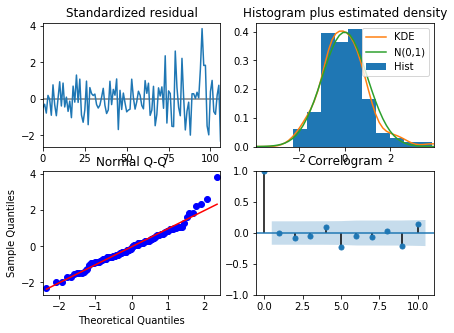

In [31]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

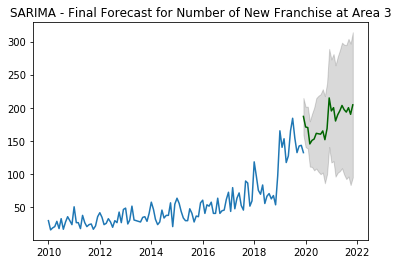

In [32]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast for Number of New Franchise at Area 3")
plt.show()

In [33]:
confint

array([[158.88754222, 214.65593466],
       [140.25854231, 201.43124329],
       [138.23436097, 201.54114401],
       [110.81345066, 179.44171131],
       [110.36728632, 190.70126301],
       [105.15993315, 199.92094372],
       [107.82567535, 214.56650628],
       [103.03561871, 218.05162033],
       [ 99.41157567, 220.37082779],
       [101.72593448, 227.95664321],
       [ 85.63170988, 217.48420781],
       [ 99.51765921, 237.55117901],
       [140.5194742 , 289.0425483 ],
       [117.10199945, 273.07845266],
       [118.96499159, 281.16135518],
       [ 95.59292713, 264.14075862],
       [101.48995102, 277.03418709],
       [103.87139167, 286.77536347],
       [108.34088486, 298.38480993],
       [ 98.78614231, 295.40695861],
       [ 91.99047037, 294.66076853],
       [ 95.80785908, 304.2307002 ],
       [ 82.88350507, 296.96905799],
       [ 94.4506955 , 314.18562736]])

In [15]:
#15

In [34]:
# Import Data
data = pd.read_csv('2010_zip_3_monthly_data.csv', parse_dates=['date'], index_col='date')

In [35]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [36]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=921.744, BIC=937.837, Time=2.441 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=1017.376, BIC=1025.423, Time=0.124 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=940.190, BIC=953.601, Time=1.200 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=964.815, BIC=978.226, Time=1.424 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=1041.135, BIC=1046.499, Time=0.214 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=951.747, BIC=965.158, Time=0.588 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=923.650, BIC=942.425, Time=2.241 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=923.607, BIC=942.382, Time=4.079 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=934.570, BIC=950.663, Time=1.326 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=925.387, BIC=946.844, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(3, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -444.040
Date:                              Sun, 29 Mar 2020   AIC                            906.080
Time:                                      22:53:37   BIC                            930.220
Sample:                                  01-01-2010   HQIC                           915.868
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.5959      0.385      1.546      0.122      -0.159       1.351
seasonal_index    -0.0014   1.47e+04  -9.82e-08      1.000   -2.88e+04    2.88e+04
ar.L1              1.9155      0.074     25.769      0.000       1.770       2.061
ar.L2             -1.5085      0.140    -10.773      0.000      -1.783      -1.234
ar.L3              0.5425      0.085      6.367      0.000       0.375       0.709
ma.L1             -1.5242      0.165     -9.252      0.000      -1.847      -1.201
ma.L2              0.9897      0.200      4.951      0.000       0.598       1.381
ma.S.L12          -0.7683      0.123     -6.251      0.000      -1.009      -0.527
sigma2           187.8286     47.396      3.963      0.000      94.935     280.723
===================================================================================
Ljung-Box (Q):                       34.57   Jarque-Bera (JB):                28.44
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""